In [29]:
import numpy as np 
import matplotlib.pyplot as plt
import sympy as sym
import scipy as scy
from tqdm import tqdm
from scipy.integrate import solve_ivp
from IPython.display import display, Math, Latex
from termcolor import colored

# Punto 1 parte 2

In [319]:
print(colored('Resolver la ecuación diferencial no lineal', attrs=['bold']))
display(Math(r'\frac{du}{dt} = u^q')) 
print( 'Para t entre [0, 10]')

Resolver la ecuación diferencial no lineal


<IPython.core.display.Math object>

Para t entre [0, 10]


In [320]:
# Valores Q
Q = np.array([0., 0.2, 0.4, 0.7, 0.9, 1.])

# Timempo que nos dara los tiempos inicial y final
tiempo = np.linspace(0, 10, 14)

# Condicion inicial t = 0; u(0) = 1
u0 = 0
r0 = np.array([0, 1])
print(tiempo)

[ 0.          0.76923077  1.53846154  2.30769231  3.07692308  3.84615385
  4.61538462  5.38461538  6.15384615  6.92307692  7.69230769  8.46153846
  9.23076923 10.        ]


In [321]:
def darSol():
    solucion = np.zeros(len(Q))
    Integral_definida = []
    %time
    for i in range(len(Q)):
        q = Q[i]
        def darEq(q_, u_):
            if q == 1.:
                du = (u_)
            else:
                du = u_**q
            return du
        # Dado que en el punto dos se pide usar sympy se empleara el integrador de sympy visto en clase
        # t_eval es Q dado que son ls puntos donde queremos conocer la solución
        Sol = solve_ivp(darEq, (tiempo[0], tiempo[-1]), r0, t_eval = tiempo, method = 'RK45')
        solucion = np.append(solucion, Sol)
    return solucion, Integral_definida

Wall time: 0 ns
Punto 1


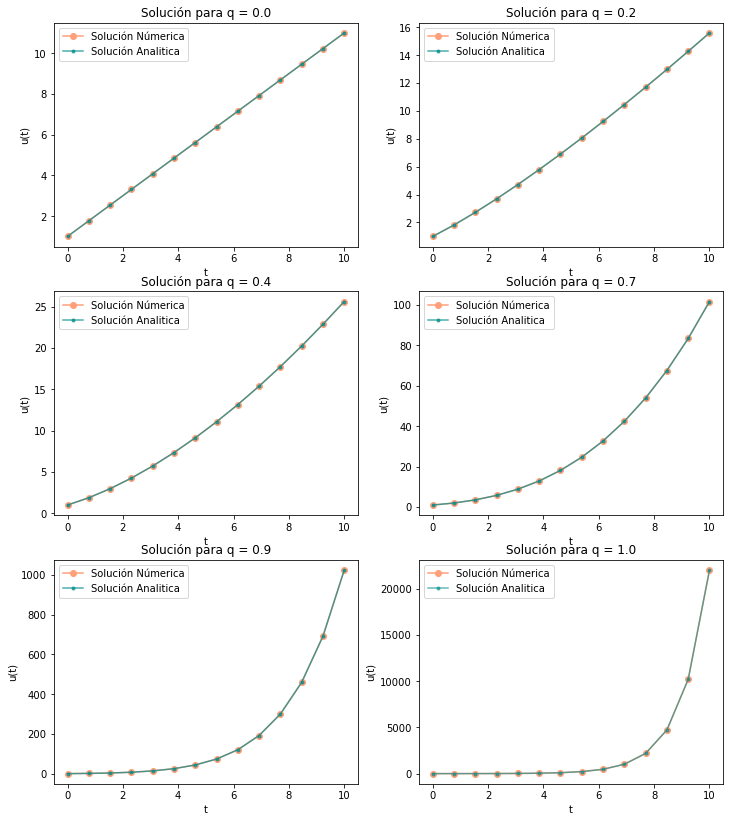

La integral defienda para t entre [0, 10] para q = 0.0 es: 10.0 
La integral defienda para t entre [0, 10] para q = 0.2 es: 14.588 
La integral defienda para t entre [0, 10] para q = 0.4 es: 24.615 
La integral defienda para t entre [0, 10] para q = 0.7 es: 100.613 
La integral defienda para t entre [0, 10] para q = 0.9 es: 1023.056 
La integral defienda para t entre [0, 10] para q = 1.0 es: 21996.816 


In [322]:
Sol = darSol()[0]
print(colored('Punto 1', attrs=['bold']))
fig, ax = plt.subplots(3, 2, figsize = (12, 14))

c  = 0
c2 = 6
for i in range(3):
    for j in range(2):
        ax[i, j].set_title(f'Solución para q = {Q[c]}')
        ax[i, j].plot(tiempo, Sol[c2].y[1], marker = 'o', label = 'Solución Númerica', color = 'lightsalmon')
        ax[i, j].set_xlabel('t')
        ax[i, j].set_ylabel('u(t)')
        if c == 5:
            ax[i, j].plot(tiempo, np.e**tiempo,  marker = '.', label ='Solución Analitica', color = 'darkcyan', alpha = 0.6)
        else:
            ax[i, j].plot(tiempo, (tiempo*(1 - Q[c])+1)**(1/(1-Q[c])),  marker = '.', label ='Solución Analitica', color = 'darkcyan', alpha = 0.7)
        ax[i, j].legend()
        c  += 1
        c2 += 1
plt.show()
for i in range(len(Sol)-6):
    print(f'La integral defienda para t entre [0, 10] para q = {Q[i]} es: {round(Sol[i+6].y[1][-1] - Sol[i+6].y[1][0], 3)} ')

# Punto 2

In [323]:
print(colored('Se requiere de los polinomios interpoladores de legendere', attrs=['bold']))
display(Math(r'L_i(x) = \prod^{k}_{j = 0, j \not = i} \frac{x - x_{j}}{x_{i}-x_{j}}')) 
print( 'Donde se tiene que y_(n + 1) esta dado como:')
print('      ')
display(Math(r'y_{n+1} =  y_n + \sum_{i=0}^{k} f_i \int_{t_n}^{t_{n+1}} L_i')) 

Se requiere de los polinomios interpoladores de legendere


<IPython.core.display.Math object>

Donde se tiene que y_(n + 1) esta dado como:
      


<IPython.core.display.Math object>

In [324]:
# Encuentre los coeficientes del método de Adams-Bashforth de tres puntos.
f = sym.Symbol('f' , Real = True) # para hace dos pasos f_(n)
f1 = sym.Symbol('f1', Real = True) # para hace dos pasos f_(n-1)
f2 = sym.Symbol('f2', Real = True) # para hace dos pasos f_(n-2)

# Para el tiempo
t = sym.Symbol('t', Real = True) # para hace dos pasos t_(n)
h = sym.Symbol('h', Real = True) # Note que la diferencia entre pasos es Kh siendo K el paso 
# Usando lo anterior se tiene:

T3 = np.array([-2*h, -h, 0, h, 2*h])            # Se guardan las diferencias desde (t_n-2) hasta (t_n+2) con respecto a t_n)
T4 = np.array([-3*h, -2*h, -h, 0, h, 2*h, 3*h])

# para y_n
yn  = sym.Symbol('yn' , Real = True)

# método de Adams-Bashforth 
def darAB(NPuntos_):
    F = np.array([])
    for i in range(NPuntos_):
        F_au = []
        for j in range(NPuntos_):
            if j != i:
                if NPuntos_ == 3:
                    f = (t-(T3[j]))/(T3[i]-((T3[j])))
                    F_au.append(f)
                elif NPuntos_ == 4:
                    f = (t-(T4[j]))/(T4[i]-((T4[j])))
                    F_au.append(f)
        if NPuntos_ == 3:
            inte = sym.integrate(F_au[0]*F_au[1], (t, 0, h))
        else:
            inte = sym.integrate(F_au[0]*F_au[1]*F_au[2], (t, 0, h))
        F = np.append(F, inte)
    Res = []
    for i in range(len(F)):
        Res.append(F[-(i+1)])
    return Res


Coef3p = darAB(3)
Coef4p = darAB(4)

In [325]:
# Método de Adams-Moulton:

def darAM(NPuntos_):
    F = np.array([])
    for i in range(2,NPuntos_+2):
        F_au = []
        for j in range(2, NPuntos_+2):
            if j != i:
                if NPuntos_ == 3:
                    f = (t-(T3[j]))/(T3[i]-((T3[j])))
                    F_au.append(f)
                elif NPuntos_ == 4:
                    f = (t-(T4[j-1]))/(T4[i-1]-((T4[j-1])))
                    F_au.append(f)
        if NPuntos_ == 3:
            inte = sym.integrate(F_au[0]*F_au[1], (t, 0, h))
        else:
            inte = sym.integrate(F_au[0]*F_au[1]*F_au[2], (t, 0, h))
        F = np.append(F, inte)
    return F

CoefM3p = darAM(3)
Coef4_alreves = darAM(4)
CoefM4p = []
for i in range(4):
    CoefM4p.append(Coef4_alreves[-(i+1)])

print(colored('Se Tiene que los Coeficientes estan dados como:', attrs=['bold']))
print('    ')
print(colored('Para el método de Adams-Bashforth:'))
print(f'Los coeficientes para Adams-Bashforth de 3 puntos son: C1 = {Coef3p[0]}, C2 = {Coef3p[1]}, C3 = {Coef3p[2]}')
print(f'Los coeficientes para Adams-Bashforth de 4 puntos son: C1 = {Coef4p[0]}, C2 = {Coef4p[1]}, C3 = {Coef4p[2]}, C4 = {Coef4p[3]}')
print('    ')
print(colored('Para el método de Adams-Moulton:'))
print(f'Los coeficientes para Adams-Moulton de 3 puntos son: C1 = {CoefM3p[0]}, C2 = {CoefM3p[1]}, C3 = {CoefM3p[2]}')
print(f'Los coeficientes para Adams-Moulton de 4 puntos son: C1 = {CoefM4p[0]}, C2 = {CoefM4p[1]}, C3 = {CoefM4p[2]}, C4 = {CoefM4p[3]}')


Se Tiene que los Coeficientes estan dados como:
    
Para el método de Adams-Bashforth:
Los coeficientes para Adams-Bashforth de 3 puntos son: C1 = 23*h/12, C2 = -4*h/3, C3 = 5*h/12
Los coeficientes para Adams-Bashforth de 4 puntos son: C1 = 55*h/24, C2 = -59*h/24, C3 = 37*h/24, C4 = -3*h/8
    
Para el método de Adams-Moulton:
Los coeficientes para Adams-Moulton de 3 puntos son: C1 = 5*h/12, C2 = 2*h/3, C3 = -h/12
Los coeficientes para Adams-Moulton de 4 puntos son: C1 = 3*h/8, C2 = 19*h/24, C3 = -5*h/24, C4 = h/24


# Punto 3

In [430]:
import matplotlib.animation as anim
import numba as nb
from mpl_toolkits.mplot3d import axes3d
import sympy as sy
import time

In [431]:
class Particle():
    
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt = t[1]-t[0]
        self.eps = 0.01 #Epsilon de tolerancia
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros((len(t),len(r0)))
        self.vVector = np.zeros((len(t),len(v0)))
        self.aVector = np.zeros((len(t),len(a0)))
        
        self.L = np.zeros(len(r0))
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        self.MomentumVector = np.zeros((len(t),len(v0)))
        
        self.EpVector = np.zeros((len(t),1))
        self.EkVector = np.zeros((len(t),1))
        
        
        self.Ep = 0.
        self.Force = self.m * self.a
        self.G = 4*np.pi**2
        
        self.rp = r0
        self.vp = v0
        
    def Evolution(self,i):
        
        # fill vectors
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        self.SetMomentum(i,self.m*self.v)
        
        
        # Energy 
        
        self.SetEk(i,self.GetKineticEnergy())
        self.SetEp(i,self.GetPotentialEnergy())
        
        # Change variables using the verlet method
        
        self.a = self.Force/self.m
        
     
        if i == 0:
            
            self.rp = self.r
            self.r = self.rp + self.dt * self.v
        
        else:
            
            self.rf = 2*self.r - self.rp + self.a * self.dt**2            
            self.v = ( self.rf - self.rp ) / (2*self.dt)
            
            self.rp = self.r
            self.r = self.rf
            
    def ResetForce(self):
        
        self.Force[:] = 0.
        self.a[:] = 0.
        self.Ep = 0.
        
    
    
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v   
        
    def SetMomentum(self,i,p):
        self.MomentumVector[i] = p
        
    def SetAngularMomentum(self,i,r,p):
        
    
        self.L[0] = r[1]*p[2] - r[2]*p[1]
        self.L[1] = -(r[0]*p[2] - r[2]*p[0])
        self.L[2] = r[0]*p[1] - r[1]*p[0]
        
        self.AngularMomentumVector[i] = self.L
            
    def SetEk(self,i,Ek):
        self.EkVector[i] = Ek
    
    def SetEp(self,i,Ep):
        self.EpVector[i] = Ep
        
    def GetForce(self,p):
        
        d = np.linalg.norm( self.r - p.GetPosition() )
        
        Fn = - self.G * self.m * p.m / (d**2+self.eps**2)**(3/2)
        
        self.Force = np.add( self.Force, Fn* (self.r - p.GetPosition())  )
        
        self.Ep += - self.G * self.m * p.m / d
                
    
    def GetPosition(self):
        return self.r
    
    def GetPositionVector(self):
        return self.rVector
    
    def GetReducePosition(self):
        return self.RrVector
        
    def GetVelocityVector(self):
        return self.vVector    
    
    def GetMomentumVector(self):
        return self.MomentumVector
    
    def GetAngularMomentumVector(self):
        return self.L
        
    def GetReduceVelocity(self):
        return self.RvVector
     
    def GetKineticEnergy(self):
        return 0.5*self.m*np.linalg.norm(self.v)**2
    
    def GetPotentialEnergy(self):
        #return -np.dot( self.m*self.a, self.r )
        return 0.5*self.Ep 
    
    def GetNetForce(self):
        return self.Force

    def GetR(self):
        return self.radius
  
    # Reducing size

    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]])
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
        self.RvVector = np.array([self.vVector[0]])
        
        for i in range(1,len(self.vVector)):
            if i%factor == 0:
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])

In [432]:
#definiendo constantes

N=100
G=4*np.pi**2
eps=0.1
m=0.01
ri_0=1
v=0
dt = 0.001
t = np.arange(0,2,dt)

def GetParticles(NParticles,Limits,dt=dt):
    Particles_ = []
    
    for i in range(NParticles):
        theta, phi = np.random.uniform(0,2*np.pi,1), np.random.uniform(0,np.pi,1)
        x0 = np.random.uniform( -1.0,1.0, size=3 )
        x0[0] = np.array([np.cos(theta)*np.sin(phi)])
        x0[1] = np.array([np.sin(theta)*np.sin(phi)])
        x0[2] = np.array([np.cos(phi)])
        v0 = np.array([0.,0.,0.])
        a0 = np.zeros(3)
        p = Particle(x0,v0,a0,t,m,0.3,i)
        
        Particles_.append(p)
        
    return Particles_

In [433]:
#Corriendo la simulación
Limites = np.array([10.,10.,10.]) 

def RunSimulation(t,NParticles=N):
    
    # Creating the particles
    Particles = GetParticles(NParticles,Limites[0],dt=dt)
      
    for it in tqdm(range(len(t))):
        
        NetForce = np.array([0,0,0])
        
        for i in range(len(Particles)):    
            for j in range(len(Particles)):
                if i != j:
                    Particles[i].GetForce(Particles[j])
             
            NetForce = np.add(NetForce,Particles[i].GetNetForce())
            
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            
            #Particles[i].CheckWallLimits(Limits)
             
        #print(NetForce)
        
    return Particles

particles = RunSimulation(t,N)

100%|██████████| 2000/2000 [05:30<00:00,  6.06it/s]


In [436]:
EnergiaK = particles[0].EkVector
EnergiaP = particles[0].EpVector
EnergiaTotal = particles[0].EkVector + particles[0].EpVector

for i in range(1,len(particles)):
    EnergiaK = np.add(EnergiaK, particles[i].EkVector)
    EnergiaP = np.add(EnergiaP, particles[i].EpVector)
    EnergiaTotal = np.add(EnergiaTotal, particles[i].EkVector + particles[i].EpVector) 

Momentum = particles[0].GetMomentumVector()
for i in range(1,len(particles)):
    Momentum = np.add(Momentum, particles[i].GetMomentumVector()) 
    
AMomentum = np.zeros(len(t))
for i in range(len(t)):
    M = np.zeros(3)
    for j in range(len(particles)):
        M = np.add(M,(np.cross(m*particles[j].GetPositionVector()[i],particles[j].GetVelocityVector()[i])))
        
    AMomentum[i] = np.linalg.norm(M)

(-0.02, 0.02)

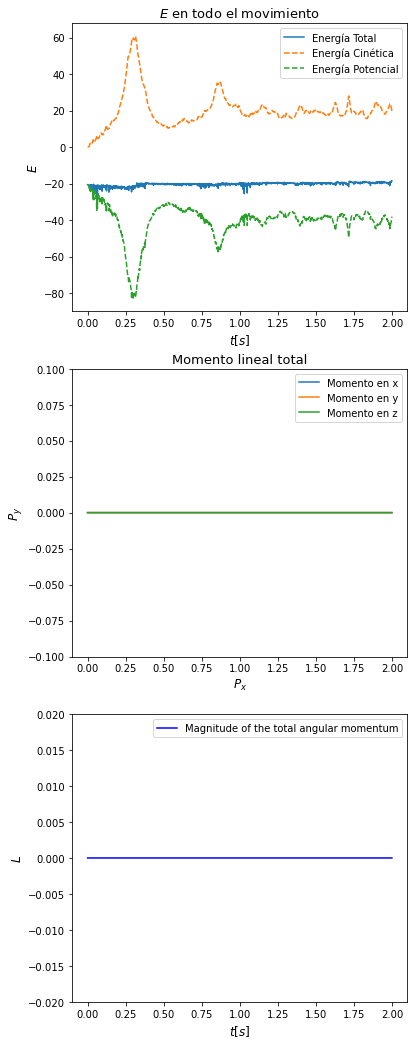

In [437]:
plt.figure(figsize=(6,18))
plt.subplot(3,1,1)
plt.title("$E$ en todo el movimiento",fontsize=13)
plt.plot(t,EnergiaTotal, label='Energía Total')
plt.plot(t,EnergiaK,'--',label='Energía Cinética')
plt.plot(t,EnergiaP,'--',label='Energía Potencial')
plt.xlabel(r'$t[s]$',fontsize=12)
plt.ylabel(r'$E$',fontsize=12)
plt.legend(loc=0)

plt.subplot(3,1,2)
plt.title("Momento lineal total",fontsize=13)
plt.plot(t,Momentum[:,0], label='Momento en x')
plt.plot(t,Momentum[:,1], label='Momento en y')
plt.plot(t,Momentum[:,2], label='Momento en z')
plt.xlabel(r'$P_x$',fontsize=12)
plt.ylabel(r'$P_y$',fontsize=12)
plt.legend(loc=0)
plt.ylim(-0.1,0.1)

plt.subplot(3,1,3)
plt.plot(t,AMomentum[0]*t,label="Magnitude of the total angular momentum", color='b')
plt.ylabel(r'$L$',fontsize=12)
plt.xlabel(r'$t[s]$',fontsize=12)
plt.legend(loc=0)
plt.ylim(-0.02,0.02)

MovieWriter imagemagick unavailable; using Pillow instead.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


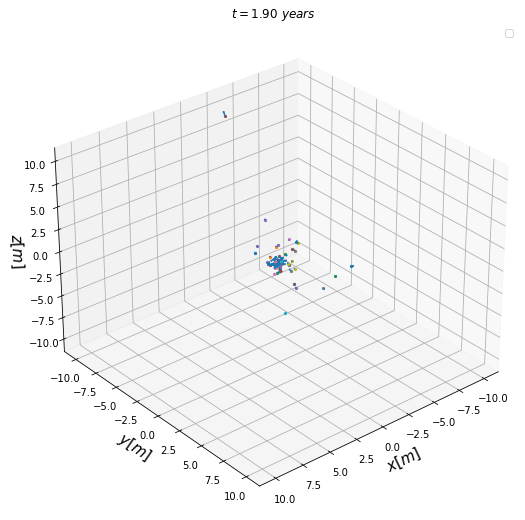

In [449]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(1,1,1, projection = '3d',elev = 30, azim = 50)

#Animando la solución
def ReduceTime(t,factor):
    
    for p in particles:
        p.ReduceSize(factor)
    
    Newt = []
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

redt = ReduceTime(t,100)


def init():
    ax.set_xlabel(r'$x[m]$',fontsize=15)
    ax.set_ylabel(r'$y[m]$',fontsize=15)
    ax.set_zlabel(r'$z[m]$',fontsize=15)
    ax.set_xlim(-Limites[0]-1,Limites[0]+1)
    ax.set_ylim(-Limites[1]-1,Limites[1]+1)
    ax.set_zlim(-Limites[2]-1,Limites[2]+1)

def Update(i):
    
    plot = ax.clear()
    init()
    
    j = 0
    
    for p in particles:
        
        x = p.GetReducePosition()[i,0]
        y = p.GetReducePosition()[i,1]
        z = p.GetReducePosition()[i,2]
        
        vx = p.GetReduceVelocity()[i,0]
        vy = p.GetReduceVelocity()[i,1]
        vz = p.GetReduceVelocity()[i,2]
        
        plot = ax.set_title(r'$t=%.2f \ years$' %(redt[i]))
        
        plot = ax.scatter(x,y,z,marker='.')
        
        plot = ax.quiver(x,y,z,vx,vy,vz,length = 0.05, normalize=False)
        j += 1
        
    plot = ax.legend()
            
    return plot
    
Animation = anim.FuncAnimation(figP4,Update,frames=len(redt),init_func=init)
Animation.save('particles.gif', writer='imagemagick')


# Punto 4

In [339]:
#Condiciones iniciales
m = 1
k = 1
N = 501
tiempo4 = np.linspace(0.,10.,N)

x0  = 1
dx0 = 0

# Inicializamos el sistema
def dar_a(x_):
    a = (-k*x_)/m # Ecuación diferencial
    return a


def darYoshida(X, V, i):
    
    # Se emplearón los coeficientes de Yoshida encontrados en la siguiente pagina de internet
    # https://hmong.es/wiki/Leapfrog_integration
    w0 = -(2**(1/3))/(2-(2**(1/3)))
    w1 = 1/(2-(2**(1/3)))
    # Para las c
    c1 = w1/2
    c2 = (w0 + w1)/2
    c3 = c2
    c4 = c1
    
    # Para las d    
    d1 = w1    
    d2 = w0
    d3 = w1 
    
    # Paso
    
    h4 =  (tiempo4[-1]-tiempo4[0])/(len(tiempo4))
    
    
    # La parte simplettica de orden 4 
    xi_1 = X[i] + c1*V[i]*h4
    vi_1 = V[i] + d1*dar_a(xi_1)*h4

    xi_2 = xi_1 + c2*vi_1*h4
    vi_2 = vi_1 + d2*dar_a(xi_2)*h4
    
    xi_3 = xi_2 + c3*vi_2*h4
    vi_3 = vi_2 + d3*dar_a(xi_3)*h4
    
    xi_4 = xi_3 + c4*vi_3*h4
    vi_4 = vi_3

    
    # Se tiene xi1 = x_(i+1) y vi1 = v_(i+1)
    xi1 = xi_4
    vi1 = vi_4
    
    return xi1, vi1


In [386]:
#Para la implementación del Metodo de Salto de Rana se uso el mismo que fue hecho en clase 
def GetLeapFrog(r0,t):
    
    N = len(t)
    h = t[1] - t[0]
    
    t1 = np.arange(t[0] - 0.5*h, t[-1] - 0.5*h + h, h)
    
    x = np.zeros(N)
    v = np.zeros(N) # El inicializador

    x[0] = r0[0]
    v[0] = r0[1] - 0.5*h*dar_a(x[0])
    
    for i in range(1,N):
        
        v[i] = v[i-1] + h*dar_a(x[i-1])
        x[i] = x[i-1] + h*v[i]
    
    # Igualando los array
    V = np.array([])
    X = np.array([])
    for i in range(len(x)-1):
        X = np.append(X,(x[i]+x[i+1])*0.5)

    V = v[1:]

    
    return X,V


In [378]:
#Rana
r0 = np.array([1.0,0])
Rana = GetLeapFrog(r0,tiempo4)
X_rana = Rana[0]
V_rana = Rana[1]

In [385]:
X_yoshi = np.array([])
V_yoshi = np.array([])

X_yoshi = np.append(X_yoshi, x0)
V_yoshi = np.append(V_yoshi, dx0)

for i in range(1, len(tiempo4)):
    a = darYoshida(X_yoshi, V_yoshi, i-1)
    X_yoshi = np.append(X_yoshi, a[0])
    V_yoshi = np.append(V_yoshi, a[1])

In [413]:
# Se encuentra la energía para salto de rana y Yoshida

# Energia Salto de Rana
EK_rana = 0.5*m*(V_rana**2)
EP_rana = 0.5*k*(X_rana**2)
ET_rana = EK_rana + EP_rana

# Energia Yoshida
EK_yoshi = 0.5*m*(V_yoshi**2)
EP_yoshi = 0.5*k*(X_yoshi**2)
ET_yoshi = EK_yoshi + EP_yoshi

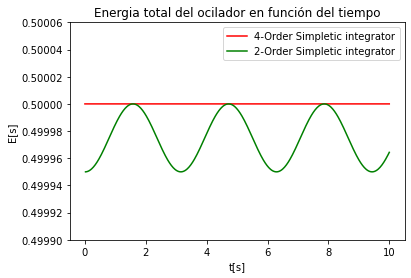

In [429]:
plt.title('Energia total del ocilador en función del tiempo')
plt.plot(tiempo4,     ET_yoshi, c = 'r', label = '4-Order Simpletic integrator')
plt.plot(tiempo4[1:], ET_rana , c = 'g', label = '2-Order Simpletic integrator')
plt.xlabel(r't[s]')
plt.ylabel(r'E[s]')
plt.legend(loc = 'upper right')
plt.ylim(0.4999, 0.50006)
plt.show()